In [13]:
import pathlib
import pandas as pd
import PIL
from PIL import Image

In [ ]:
directory = '/home/marcos/Documentos/Projetos/Keras - imagens/uvas'
data_dir = pathlib.Path(directory)

len(list(data_dir.glob('*/*.JPG')))

1600

In [5]:
subfolders = [f.name for f in data_dir.iterdir() if f.is_dir()]
subfolders

['BlackMeasles', 'BlackRot', 'HealthyGrapes', 'LeafBlight']

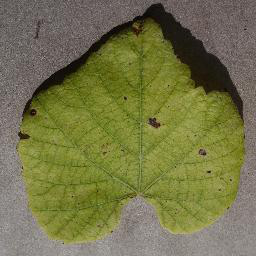

In [ ]:
leafblight = list(data_dir.glob('LeafBlight/*'))
PIL.Image.open(str(leafblight[0]))